In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [29]:
df = pd.read_csv('Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5999 non-null   int64 
 1   Airline      5999 non-null   object
 2   Flight       5999 non-null   int64 
 3   AirportFrom  5999 non-null   object
 4   AirportTo    5999 non-null   object
 5   DayOfWeek    5999 non-null   int64 
 6   Time         5999 non-null   int64 
 7   Length       5999 non-null   int64 
 8   Delay        5999 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 421.9+ KB


In [31]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,5999.000000,5999.000000,5999.0,5999.000000,5999.000000,5999.000000
mean,3000.000000,2402.031172,3.0,490.886648,133.032505,0.352392
std,1731.906464,2080.854442,0.0,94.426539,70.059476,0.477755
min,1.000000,1.000000,3.0,15.000000,24.000000,0.000000
25%,1500.500000,703.000000,3.0,420.000000,82.000000,0.000000
50%,3000.000000,1734.000000,3.0,495.000000,115.000000,0.000000
75%,4499.500000,3745.500000,3.0,570.000000,164.000000,1.000000
max,5999.000000,7801.000000,3.0,652.000000,620.000000,1.000000


Data Cleaning

In [32]:
print(df['DayOfWeek'].unique())

[3]


In [33]:
print("Before: ",df.columns)
df = df.drop(['id','DayOfWeek'], axis=1)
print("\nAfter: ",df.columns)

Before:  Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

After:  Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'Time', 'Length',
       'Delay'],
      dtype='object')


In [34]:
df

,Airline,Flight,AirportFrom,AirportTo,Time,Length,Delay
0,CO,269,SFO,IAH,15,205,1
1,US,1558,PHX,CLT,15,222,1
2,AA,2400,LAX,DFW,20,165,1
3,AA,2466,SFO,DFW,20,195,1
4,AS,108,ANC,SEA,30,202,0
...,...,...,...,...,...,...,...
5994,XE,2088,MAF,IAH,651,84,1
5995,9E,3789,ICT,ATL,652,132,0
5996,FL,104,DFW,ATL,652,118,0
5997,OO,6499,SJC,LAX,652,79,0


In [35]:
# Now that we have a brief overview of our data, 
# we will see if we need to do any cleaning by checking
# if theres any null values or duplicate values. 
# There doesn't seem to be anything wrong with the type our columns are.

print(df.isnull().sum() )

print("\nDuplicate values count: ",df.duplicated().sum())

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
Time           0
Length         0
Delay          0
dtype: int64

Duplicate values count:  0


In [36]:
dist_airlines = df['Airline'].unique()

print("Different Airlines: ",dist_airlines)
print(len(dist_airlines))

print("Different AirportFrom:",df['AirportFrom'].nunique())
print("Different AirportTo:",df['AirportTo'].nunique())

Different Airlines:  ['CO' 'US' 'AA' 'AS' 'DL' 'B6' 'HA' 'OO' '9E' 'OH' 'EV' 'XE' 'YV' 'UA'
 'MQ' 'FL' 'F9' 'WN']
18
Different AirportFrom: 271
Different AirportTo: 250


Graph Analysis

<AxesSubplot:xlabel='Airline', ylabel='Delay'>

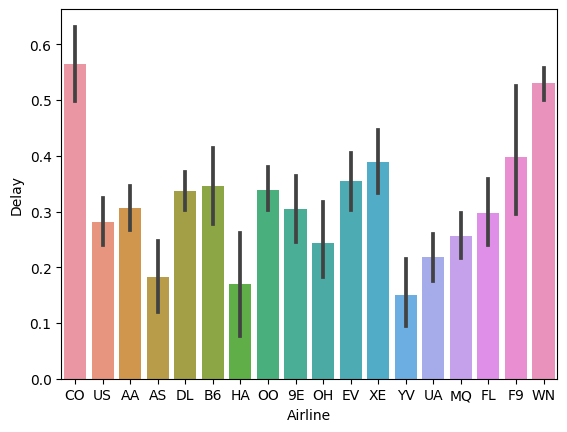

In [37]:

import seaborn as sb
# It looks like each airline has different amounts of delays. 
# Some airlines are more likely to have delays compared to other airlines. 
# For example, the WN airline are delayed about 70% of the time they 
# have a flight.

sb.barplot(x= df['Airline'], y = df['Delay'])

<AxesSubplot:xlabel='Airline', ylabel='Length'>

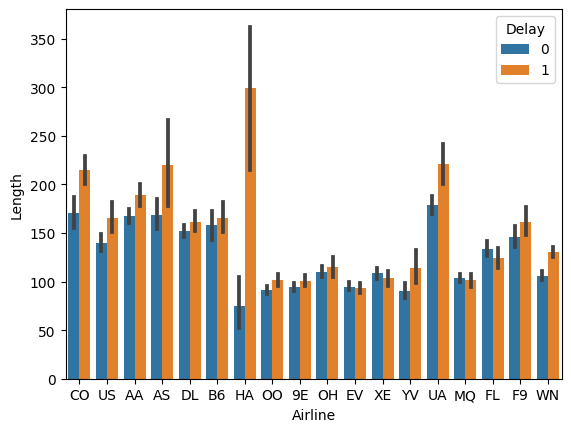

In [38]:

# One thing that can be seen is that for all the airlines, 
# the flight length when there is a delay are always higher than 
# the flight length when there is no delay.


import seaborn as sb

sb.barplot(x = df['Airline'], y = df['Length'], hue = df['Delay'])

Text(0.5, 1.0, 'Distribution of Length')

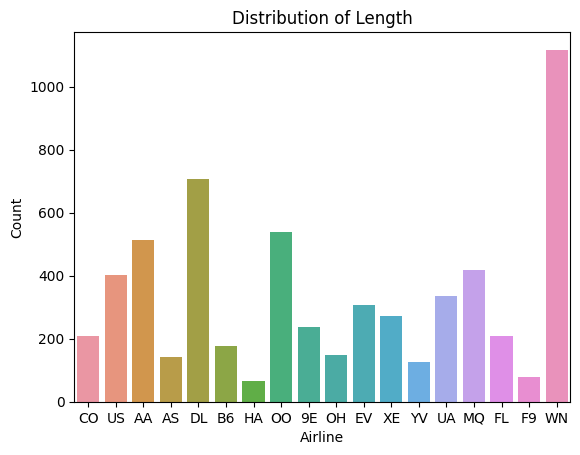

In [39]:
import seaborn as sns

sns.countplot(x='Airline',data=df)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Distribution of Length')

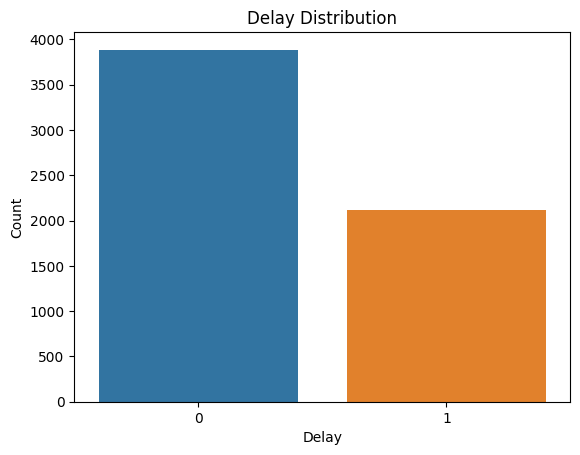

In [40]:
import seaborn as sns

sns.countplot(x='Delay', data=df)
plt.title('Delay Distribution')
plt.xlabel('Delay')
plt.ylabel('Count')
plt.show()


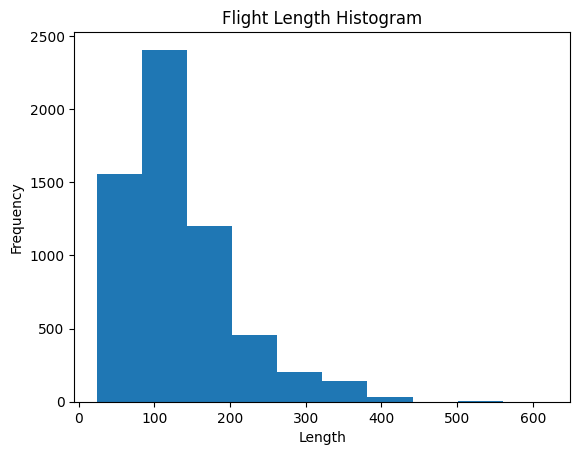

In [41]:
plt.hist(df['Length'], bins=10)
plt.title('Flight Length Histogram')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


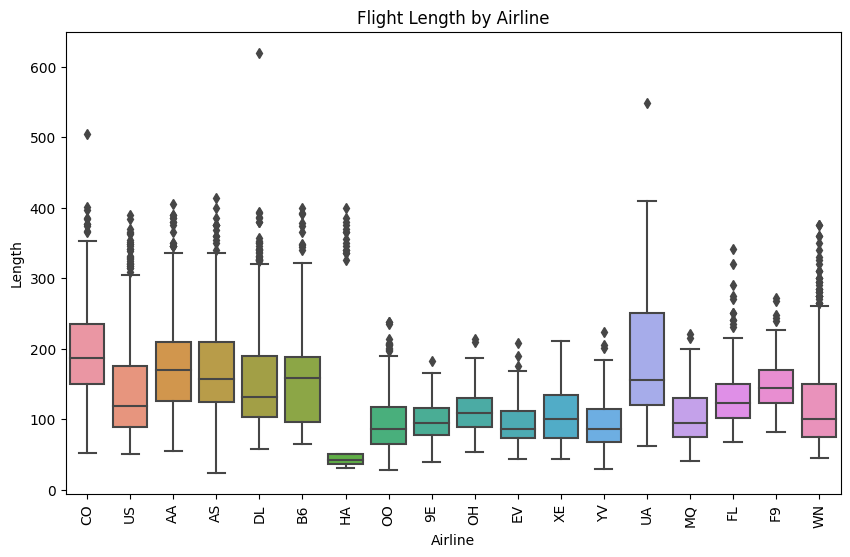

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Length', data=df)
plt.title('Flight Length by Airline')
plt.xlabel('Airline')
plt.ylabel('Length')
plt.xticks(rotation=90)
plt.show()


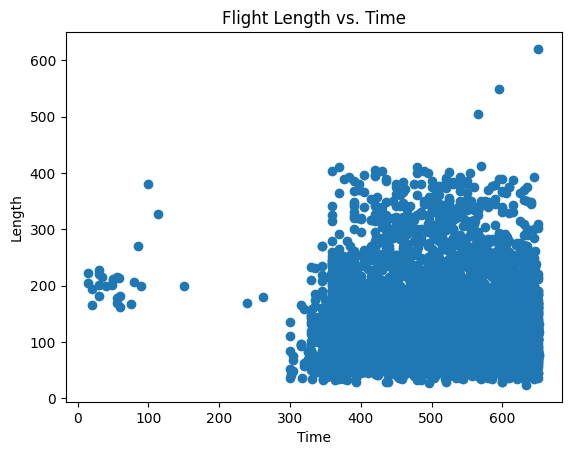

In [43]:
plt.scatter(df['Time'], df['Length'])
plt.title('Flight Length vs. Time')
plt.xlabel('Time')
plt.ylabel('Length')
plt.show()



DATA PREPROCESSING


In [44]:
df[:3]

,Airline,Flight,AirportFrom,AirportTo,Time,Length,Delay
0,CO,269,SFO,IAH,15,205,1
1,US,1558,PHX,CLT,15,222,1
2,AA,2400,LAX,DFW,20,165,1


In [45]:
X_cat = df[['Airline', 'AirportFrom', 'AirportTo']]
X_num = df.drop(['Airline', 'AirportFrom', 'AirportTo', 'Delay'], axis=1)

X_cat = pd.get_dummies(X_cat, drop_first=True)

In [46]:
X_cat

,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,Airline_MQ,...,AirportTo_TWF,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5996,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Delay']

In [48]:
print("X_scaled\n",X_scaled)
print("X\n",X)
print("y\n",y)

X_scaled
         Flight      Time    Length
0    -1.025160 -5.040175  1.027320
1    -0.405651 -5.040175  1.269991
2    -0.000976 -4.987220  0.456329
3     0.030744 -4.987220  0.884572
4    -1.102539 -4.881308  0.984496
...        ...       ...       ...
5994 -0.150927  1.695781 -0.699928
5995  0.666594  1.706372 -0.014739
5996 -1.104461  1.706372 -0.214586
5997  1.969052  1.706372 -0.771302
5998  2.135824  1.706372 -0.814126

[5999 rows x 3 columns]
X
         Flight      Time    Length  Airline_AA  Airline_AS  Airline_B6   
0    -1.025160 -5.040175  1.027320       False       False       False  \
1    -0.405651 -5.040175  1.269991       False       False       False   
2    -0.000976 -4.987220  0.456329        True       False       False   
3     0.030744 -4.987220  0.884572        True       False       False   
4    -1.102539 -4.881308  0.984496       False        True       False   
...        ...       ...       ...         ...         ...         ...   
5994 -0.150927  1.695781


BUILDING MODEL


In [49]:
df.head()

,Airline,Flight,AirportFrom,AirportTo,Time,Length,Delay
0,CO,269,SFO,IAH,15,205,1
1,US,1558,PHX,CLT,15,222,1
2,AA,2400,LAX,DFW,20,165,1
3,AA,2466,SFO,DFW,20,195,1
4,AS,108,ANC,SEA,30,202,0


In [50]:
from sklearn.model_selection import train_test_split,cross_val_score

train,test = np.split(df.sample(frac=1),[int(0.8*len(df))])

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


RandomForestClassifierModel = RandomForestClassifier()
RandomForestClassifierModel.fit(X_train, y_train)
y_pred = RandomForestClassifierModel.predict(X_test)
print('Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

print(classification_report(y_test, y_pred))

Score is :  0.6941666666666667
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       763
           1       0.65      0.35      0.45       437

    accuracy                           0.69      1200
   macro avg       0.68      0.62      0.62      1200
weighted avg       0.68      0.69      0.67      1200



In [62]:
scores = cross_val_score(RandomForestClassifierModel,X_train, y_train,cv=5,scoring='accuracy')

print("cross validation scores: ",scores)
print("Mean accuracy",scores.mean())

cross validation scores:  [0.70625    0.696875   0.709375   0.69895833 0.70177268]
Mean accuracy 0.7026462026416407


LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression


LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel = LogisticRegressionModel.fit(X_train,y_train)

y_pred = LogisticRegressionModel.predict(X_test)
acc = LogisticRegressionModel.score(X_test,y_test)

print("Score",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Score 0.6708333333333333
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       763
           1       0.58      0.36      0.45       437

    accuracy                           0.67      1200
   macro avg       0.64      0.61      0.61      1200
weighted avg       0.65      0.67      0.65      1200



c:\Users\HARSHIT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier


DecisionTreeClassifiermodel = DecisionTreeClassifier()
DecisionTreeClassifiermodel.fit(X_train, y_train)
y_pred = DecisionTreeClassifiermodel.predict(X_test)

print('Score is : ' , DecisionTreeClassifiermodel.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Score is :  0.6375
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       763
           1       0.50      0.43      0.46       437

    accuracy                           0.64      1200
   macro avg       0.60      0.59      0.59      1200
weighted avg       0.63      0.64      0.63      1200



In [63]:
scores = cross_val_score(DecisionTreeClassifiermodel,X_train, y_train,cv=5,scoring='accuracy')

print("cross validation scores: ",scores)
print("Mean accuracy",scores.mean())

cross validation scores:  [0.63645833 0.63854167 0.646875   0.65833333 0.64129301]
Mean accuracy 0.6443002693778241


SVM

In [65]:
from sklearn.svm import SVC

svmModel = SVC()
svmModel = svmModel.fit(X_train,y_train)
y_pred = svmModel.predict(X_test)

acc = svmModel.score(X_test,y_test)

print("Score",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Score 0.6958333333333333
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       763
           1       0.68      0.31      0.43       437

    accuracy                           0.70      1200
   macro avg       0.69      0.61      0.61      1200
weighted avg       0.69      0.70      0.66      1200



In [66]:
scores = cross_val_score(svmModel,X_train, y_train,cv=5,scoring='accuracy')

print("cross validation scores: ",scores)
print("Mean accuracy",scores.mean())

cross validation scores:  [0.70208333 0.71666667 0.709375   0.69791667 0.70698644]
Mean accuracy 0.7066056221758776


KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier


KNeighborsClassifierModel = KNeighborsClassifier()
KNeighborsClassifierModel = KNeighborsClassifierModel.fit(X_train,y_train)

y_pred = KNeighborsClassifierModel.predict(X_test)
acc = KNeighborsClassifierModel.score(X_test,y_test)

print("Score",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Score 0.6516666666666666
              precision    recall  f1-score   support

           0       0.70      0.80      0.74       763
           1       0.53      0.39      0.45       437

    accuracy                           0.65      1200
   macro avg       0.61      0.60      0.60      1200
weighted avg       0.64      0.65      0.64      1200



In [71]:
scores = cross_val_score(KNeighborsClassifierModel,X_train, y_train,cv=5,scoring='accuracy')

print("cross validation scores: ",scores)
print("Mean accuracy",scores.mean())

cross validation scores:  [0.66666667 0.66770833 0.66145833 0.66875    0.67674661]
Mean accuracy 0.6682659888773028
